<a href="https://colab.research.google.com/github/chalika-vanyaa/Dicoding-BMLP_Self_Project/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Chalika_Vanya_Resya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fileName = '/content/drive/MyDrive/Online Courses/Dicoding/ML Engineer Track/ML FinPro/dataset/'
os.chdir(fileName)

In [ ]:
# load clustered df file
clustered_df = pd.read_csv('clustered_data.csv')
clustered_df

,CustomerAge,TransactionDate_hour,TransactionDate_hour_cos,TransactionDate_hour_sin,AccountBalance,TransactionDate_month,TransactionDate_month_sin,TransactionDate_month_cos,TransactionAmount,TransactionDuration,CustomerOccupation,Cluster
0,70,16,-5.000000e-01,-0.866025,5112.21,4,8.660254e-01,-5.000000e-01,14.09,81,Doctor,1
1,68,16,-5.000000e-01,-0.866025,13758.91,6,1.224647e-16,-1.000000e+00,376.24,141,Doctor,1
2,19,18,-1.836970e-16,-1.000000,1122.35,7,-5.000000e-01,-8.660254e-01,126.29,56,Student,7
3,26,16,-5.000000e-01,-0.866025,8569.06,5,5.000000e-01,-8.660254e-01,184.50,25,Student,5
4,26,17,-2.588190e-01,-0.965926,7429.40,10,-8.660254e-01,5.000000e-01,13.45,198,Student,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,33,17,-2.588190e-01,-0.965926,12690.79,4,8.660254e-01,-5.000000e-01,856.21,109,Doctor,2
2508,48,17,-2.588190e-01,-0.965926,254.75,3,1.000000e+00,6.123234e-17,251.54,177,Doctor,2
2509,56,17,-2.588190e-01,-0.965926,3382.91,8,-8.660254e-01,-5.000000e-01,28.63,146,Retired,6
2510,23,16,-5.000000e-01,-0.866025,1776.91,2,8.660254e-01,5.000000e-01,185.97,19,Student,5


In [ ]:
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerAge                2512 non-null   int64  
 1   TransactionDate_hour       2512 non-null   int64  
 2   TransactionDate_hour_cos   2512 non-null   float64
 3   TransactionDate_hour_sin   2512 non-null   float64
 4   AccountBalance             2512 non-null   float64
 5   TransactionDate_month      2512 non-null   int64  
 6   TransactionDate_month_sin  2512 non-null   float64
 7   TransactionDate_month_cos  2512 non-null   float64
 8   TransactionAmount          2512 non-null   float64
 9   TransactionDuration        2512 non-null   int64  
 10  CustomerOccupation         2512 non-null   object 
 11  Cluster                    2512 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 235.6+ KB


In [ ]:
# categorical encoding for CustomerOccupation
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(clustered_df[['CustomerOccupation']]),
                          columns=encoder.get_feature_names_out(['CustomerOccupation']))

df = pd.concat([clustered_df, encoded_df], axis=1)
df = df.drop('CustomerOccupation', axis=1)

In [ ]:
# separate target variable from features
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [ ]:
# check cluster proportions
y.value_counts(normalize=True)

,proportion
Cluster,
1,0.385350
5,0.138535
6,0.120621
2,0.119825
4,0.109076
3,0.085589
7,0.041003


> Setelah diperiksa, ditemukan bahwa proposi pembagian kelas tidak seimbang. Oleh karena itu, untuk menghindari adanya kelas yang lebih mendominasi, dilakukan proses *resampling*.

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,CustomerAge,TransactionDate_hour,TransactionDate_hour_cos,TransactionDate_hour_sin,AccountBalance,TransactionDate_month,TransactionDate_month_sin,TransactionDate_month_cos,TransactionAmount,TransactionDuration,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,1.423718,-0.856729,-0.847623,0.935219,-0.000537,-0.737432,1.267745,-0.729430,-0.971275,-0.552443,-0.575512,-0.559572,-0.595128
1,1.311287,-0.856729,-0.847623,0.935219,2.216472,-0.161875,0.037597,-1.434162,0.269440,0.305314,-0.575512,-0.559572,-0.595128
2,-1.443277,1.879574,1.910252,-1.443304,-1.023534,0.125903,-0.672630,-1.245329,-0.586882,-0.909842,-0.575512,-0.559572,1.680309
3,-1.049768,-0.856729,-0.847623,0.935219,0.885797,-0.449653,0.747823,-1.245329,-0.387456,-1.353017,-0.575512,-0.559572,1.680309
4,-1.049768,0.511423,0.482671,-0.838367,0.593589,0.989238,-1.192552,0.680035,-0.973468,1.120184,-0.575512,-0.559572,1.680309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,-0.656259,0.511423,0.482671,-0.838367,1.942606,-0.737432,1.267745,-0.729430,1.913802,-0.152156,-0.575512,-0.559572,-0.595128
2508,0.186975,0.511423,0.482671,-0.838367,-1.245986,-1.025210,1.458050,-0.024697,-0.157779,0.819969,-0.575512,-0.559572,-0.595128
2509,0.636700,0.511423,0.482671,-0.838367,-0.443928,0.413681,-1.192552,-0.729430,-0.921462,0.376794,-0.575512,1.787080,-0.595128
2510,-1.218415,-0.856729,-0.847623,0.935219,-0.855705,-1.312988,1.267745,0.680035,-0.382420,-1.438793,-0.575512,-0.559572,1.680309


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

print(f'Training set dimension: {X_train.shape}')
print(f'Testing set dimension: {X_test.shape}')

Training set dimension: (1758, 13)
Testing set dimension: (754, 13)


In [ ]:
# resampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_resampled).value_counts(normalize=True))

Cluster
1    0.142857
3    0.142857
6    0.142857
4    0.142857
5    0.142857
7    0.142857
2    0.142857
Name: proportion, dtype: float64


> Metode *resampling* yang dilakukan adalah *oversampling* dengan SMOTE. Setelah diperiksa kembali, proposi setiap kelas sudah seimbang.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# model selection: KNN, Decision Tree, Random Forest, SVM

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# model training
knn = KNeighborsClassifier().fit(X_resampled, y_resampled)
dt = DecisionTreeClassifier(random_state=42).fit(X_resampled, y_resampled)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_resampled, y_resampled)
svm = SVC().fit(X_resampled, y_resampled)
lr = LogisticRegression().fit(X_resampled, y_resampled)

# print notice
print('Model training is complete.')

Model training is complete.


> Proses klasifikasi dilakukan dengan menggunakan beberapa pilihan algoritma, seperti **K-Nearest Neighbour**, **Support Vector Machine**, **Logistic Regression**, **Decision Tree Classifier**, serta **Random Forest Classifier**. Hasil evaluasi setiap model kemudian akan dibandingkan pada sebuah tabel untuk mempermudah menentukan model terbaik dalam melakukan klasifikasi.

In [ ]:
# function to visualize the learning curve of every model
from sklearn.model_selection import learning_curve

def learning_curve_plot(model, X_train, y_train):
  # calculate the learning curve
  train_sizes, train_scores, test_scores = learning_curve(
      model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

  # calculate the mean and std
  train_mean = np.mean(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)

  # plot the learning curve
  plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
  plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Testing Accuracy')
  plt.title(f'Learning Curve of {type(model).__name__}')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
# function to evaluate training and testing data based on accuracy
def train_test_acc(model, X_train, X_test, y_train, y_test):
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)

  print(f'Training accuracy: {train_acc:.3f}')
  print(f'Testing accuracy: {test_acc:.3f}')

> Kedua fungsi di atas, `learning_curve_plot()` dan `train_test_acc()` adalah fungsi yang memberikan informasi serta menampilkan visualisasi performa model berdasarkan metrik akurasi terhadap jumlah dataset yang digunakan. Informasi ini berguna untuk mengidentifikasi terjadinya *overfitting* atau *underfitting* sehingga langkah perbaikan dapat dilakukan jika diperlukan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# function to display model evaluation based (metrics and confusion matrix)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test=X_test, y_test=y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  # metric scores
  accuracy = round(accuracy_score(y_test, y_pred), 3)

  # per class
  class_precision = np.round(precision_score(y_test, y_pred, average=None), 3)
  class_recall = np.round(recall_score(y_test, y_pred, average=None), 3)
  class_f1 = np.round(f1_score(y_test, y_pred, average=None), 3)

  # macro average
  precision_macro = round(precision_score(y_test, y_pred, average='macro'), 3)
  recall_macro = round(recall_score(y_test, y_pred, average='macro'), 3)
  f1_macro = round(f1_score(y_test, y_pred, average='macro'), 3)

  print(f'==== Model {type(model).__name__} ====\n')
  print('Confusion Matrix')
  print(cm)
  print()
  print('Metrics Scores')
  print(f'Accuracy: {accuracy}')
  print(f'Precision (Macro Avg.): {precision_macro}')
  print(f'Recall (Macro Avg.): {recall_macro}')
  print(f'F1-Score (Macro Avg.): {f1_macro}')
  print()
  print('Classification Report')
  print(classification_report(y_pred, y_test))

  summary = {
      'Confusion Matrix': cm,
      'Accuracy': accuracy,
      'Precision (Macro Avg.)': precision_macro,
      'Recall (Macro Avg.)': recall_macro,
      'F1-Score (Macro Avg.)': f1_macro
  }

  return summary

> Fungsi `evaluate_model()` akan menampilkan beberapa hasil evaluasi, berupa *confusion matrix*, nilai metrik (*accuracy*, *precision*, *recall*, dan *f1-score*), serta *classification report*. Perhitungan setiap metrik menggunakan nilai *macro average* karena proporsi setiap kelas telah disamakan melalui proses *resampling* agar tidak ada kelas yang mendominasi.

In [ ]:
# function to visualize the confusion matrix using heatmap
def cm_heatmap(model, cm, labels):
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, cmap='icefire', fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
  plt.title(f'{type(model).__name__} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

#### **1. KNN**

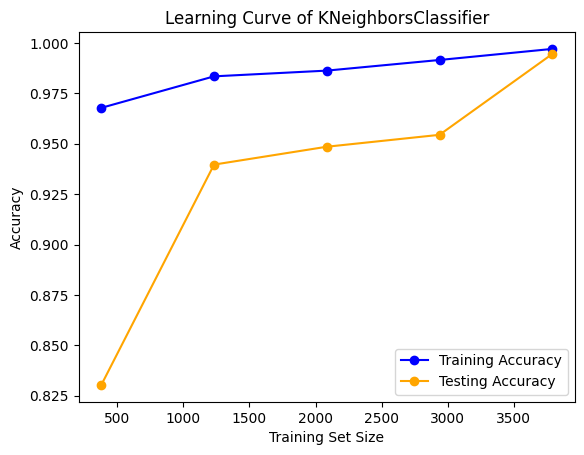

In [ ]:
# visualize the learning plot of knn model
learning_curve_plot(knn, X_resampled, y_resampled)

In [ ]:
# print the training and testing accuracy score
train_test_acc(knn, X_resampled, X_test, y_resampled, y_test)

Training accuracy: 0.997
Testing accuracy: 0.967


> Berdasarkan visualisasi *learning curve*, model KNN menunjukkan kenaikan nilai akurasi pada data *training* maupun *testing* seiring bertambahnya jumlah data latih. Perbedaan akurasi antara keduanya juga tidak terlalu besar. Hal ini mengindikasikan bahwa model yang dapat melakukan generalisasi dengan baik, terutama ketika ukuran data latih yang digunakan cukup besar.

In [ ]:
# model evaluation
knn_result = evaluate_model(knn)

==== Model KNeighborsClassifier ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  81   0   0   0   9   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  3   0   0   0 101   0   0]
 [  0  11   0   0   0  80   0]
 [  0   0   1   1   0   0  29]]

Metrics Scores
Accuracy: 0.967
Precision (Macro Avg.): 0.963
Recall (Macro Avg.): 0.955
F1-Score (Macro Avg.): 0.959

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       294
           2       0.90      0.88      0.89        92
           3       1.00      0.98      0.99        66
           4       1.00      0.99      0.99        83
           5       0.97      1.00      0.99       101
           6       0.88      0.90      0.89        89
           7       0.94      1.00      0.97        29

    accuracy                           0.97       754
   macro avg       0.96      0.96      0.96       754
weighted avg       0.97      0.97      0.97 

> Berdasarkan hasil evaluasi, nilai keempat metrik cukup baik, baik ditinjau dari setiap kelas maupun secara keseluruhan menggunakan *macro average*. Hal ini menunjukkan performa model yang cukup baik dalam mengklasifikasikan setiap kelas tanpa adanya indikasi seperti *overfitting* maupun *underfitting*.



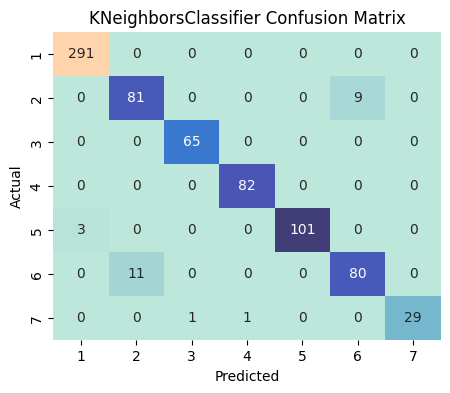

In [ ]:
# display the confusion matrix using heatmap visualization
cm_heatmap(knn, knn_result['Confusion Matrix'], labels=np.unique(y_test))

#### **2. Decision Tree**

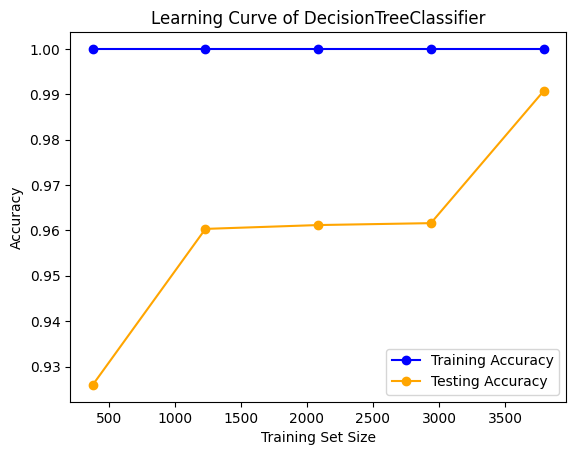

In [ ]:
# visualize the learning plot of decision tree model
learning_curve_plot(dt, X_resampled, y_resampled)

In [ ]:
# print the training and testing accuracy score
train_test_acc(dt, X_resampled, X_test, y_resampled, y_test)

Training accuracy: 1.000
Testing accuracy: 0.984


> Pada visualisasi *learning curve*, terlihat bahwa akurasi data latih sangat baik, bahkan bernilai sempurna di setiap ukuran *training set*. Hal ini merupakan indikasi kuat bahwa model mengalami *overfitting*. Walaupun begitu, hal ini cukup wajar mengingat model decision tree cukup rentan terhadap terjadinya *overfitting*. Namun, nilai akurasi data *testing* menunjukkan adanya kenaikan seiring dengan bertambahnya jumlah data latih. Perbedaan nilai akurasi antara kedua data ini juga tidak terlalu besar sehingga pada model ini, sangat penting data latih yang digunakan berukuran besar untuk mencegah terjadinya *overfitting*.


In [ ]:
# model evaluation
dt_result = evaluate_model(dt)

==== Model DecisionTreeClassifier ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  85   0   0   0   5   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  81   0   0   1]
 [  2   0   0   0 102   0   0]
 [  0   3   0   0   0  88   0]
 [  0   0   0   1   0   0  30]]

Metrics Scores
Accuracy: 0.984
Precision (Macro Avg.): 0.98
Recall (Macro Avg.): 0.978
F1-Score (Macro Avg.): 0.979

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       293
           2       0.94      0.97      0.96        88
           3       1.00      1.00      1.00        65
           4       0.99      0.99      0.99        82
           5       0.98      1.00      0.99       102
           6       0.97      0.95      0.96        93
           7       0.97      0.97      0.97        31

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98

> Berdasarkan hasil evaluasi, nilai keempat metrik sudah sangat baik,  baik ditinjau dari setiap kelas maupun secara keseluruhan menggunakan *macro average*. Hal ini mengindikasikan performa model yang sangat baik dalam mengklasifikasikan setiap kelas, bahkan lebih unggul jika dibandingkan dengan model KNN. Namun, perlu diperhatikan juga adanya indikasi *overfitting* terhadap model yang mungkin memengaruhi performa model itu sendiri saat melakukan generalisasi terhadap data baru.


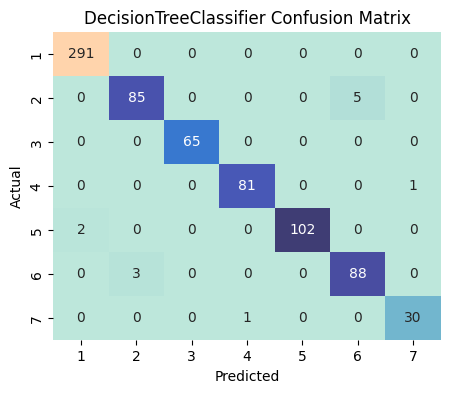

In [ ]:
# display the confusion matrix using heatmap visualization
cm_heatmap(dt, dt_result['Confusion Matrix'], labels=np.unique(y_test))

#### **3. Random Forest**

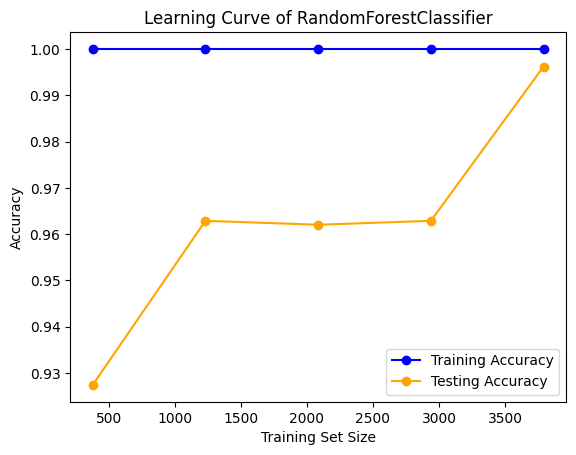

In [ ]:
# visualize the learning plot of random forest model
learning_curve_plot(rf, X_resampled, y_resampled)

In [ ]:
# print the training and testing accuracy score
train_test_acc(rf, X_resampled, X_test, y_resampled, y_test)

Training accuracy: 1.000
Testing accuracy: 0.981


> Visualisasi *learning curve* di atas menunjukkan pola kenaikan akurasi terhadap data *training* dan *testing* yang cukup mirip dengan model decision tree sebelumnya. Namun, model random forest menunjukkan akurasi yang lebih baik, terutama saat ukuran *training set* bertambah. Tidak hanya itu, model random forest juga cenderung lebih baik dalam mengatasi permasalahan *overfitting* dibandingkan decision tree karena memanfaatkan rata-rata dari hasil penggabungan beberapa *tree*. Hal inilah yang menjadi salah satu keunggulan model ini.


In [ ]:
# model evaluation
rf_result = evaluate_model(rf)

==== Model RandomForestClassifier ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  89   0   0   0   1   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  3   0   0   0 101   0   0]
 [  0   9   0   0   0  82   0]
 [  0   0   0   1   0   0  30]]

Metrics Scores
Accuracy: 0.981
Precision (Macro Avg.): 0.982
Recall (Macro Avg.): 0.976
F1-Score (Macro Avg.): 0.978

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       294
           2       0.99      0.91      0.95        98
           3       1.00      1.00      1.00        65
           4       1.00      0.99      0.99        83
           5       0.97      1.00      0.99       101
           6       0.90      0.99      0.94        83
           7       0.97      1.00      0.98        30

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.9

> Hasil evaluasi model random forest juga menunjukkan performa yang sangat baik diukur dari keempat metrik. Model ini dapat menggeneralisasikan data dengan baik, terutama dengan jumlah data latih yang cukup, dan cenderung tidak mengalami *overfitting*. Hal ini mengindikasikan bahwa model ini cocok digunakan untuk data ini.



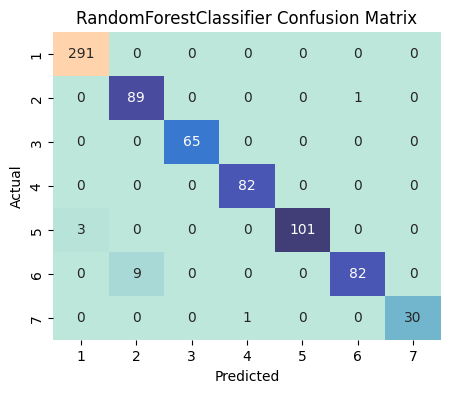

In [ ]:
# display the confusion matrix using heatmap visualization
cm_heatmap(rf, rf_result['Confusion Matrix'], labels=np.unique(y_test))

#### **4. SVM**

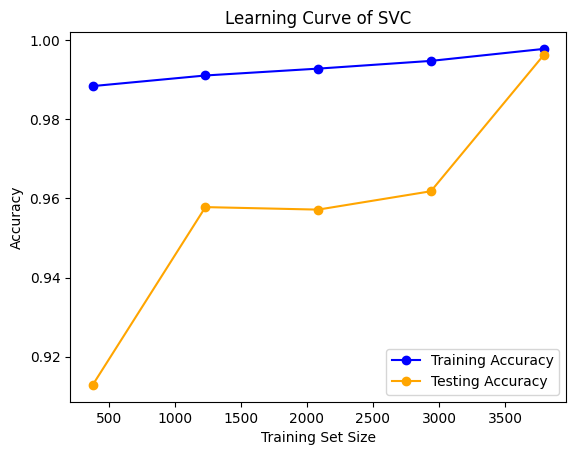

In [ ]:
# visualize the learning plot of svm model
learning_curve_plot(svm, X_resampled, y_resampled)

In [ ]:
# print the training and testing accuracy score
train_test_acc(svm, X_resampled, X_test, y_resampled, y_test)

Training accuracy: 0.998
Testing accuracy: 0.985


> *Learning curve* di atas menunjukkan kenaikan akurasi yang cukup stabil pada data *training* dan sedikit fluktuasi pada data *testing*. Meskipun demikian, nilai akurasi data *testing* tetap menunjukkan tren peningkatan seiring bertambahnya ukuran *training set*. Perbedaan nilai akurasi keduanya juga tidak terlalu besar. Hal ini mengindikasikan bahwa model tergolong *good fit* pada data yang cukup dan tidak menunjukkan tanda-tanda *overfitting* maupun *underfitting* yang signifikan.


In [ ]:
# model evaluation
svm_result = evaluate_model(svm)

==== Model SVC ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  87   0   0   0   3   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  3   0   0   0 101   0   0]
 [  0   4   0   0   0  87   0]
 [  0   0   0   1   0   0  30]]

Metrics Scores
Accuracy: 0.985
Precision (Macro Avg.): 0.986
Recall (Macro Avg.): 0.98
F1-Score (Macro Avg.): 0.983

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       294
           2       0.97      0.96      0.96        91
           3       1.00      1.00      1.00        65
           4       1.00      0.99      0.99        83
           5       0.97      1.00      0.99       101
           6       0.96      0.97      0.96        90
           7       0.97      1.00      0.98        30

    accuracy                           0.99       754
   macro avg       0.98      0.99      0.98       754
weighted avg       0.99      0.99      0.99       754



> Hasil evaluasi menunjukkan performa yang sangat baik pada keempat metrik, baik secara keseluruhan (*macro average*) maupun per kelas. Bahkan, performa model SVM terlihat lebih unggul dibandingkan ketiga model sebelumnya.



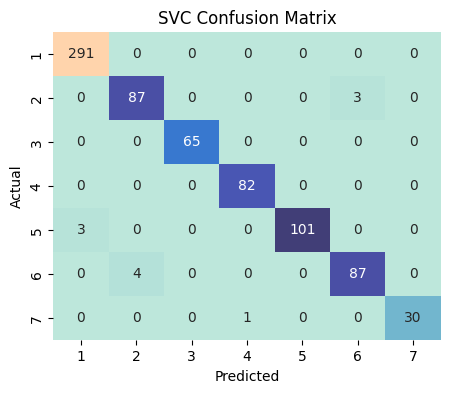

In [ ]:
# display the confusion matrix using heatmap visualization
cm_heatmap(svm, svm_result['Confusion Matrix'], labels=np.unique(y_test))

#### **5. Logistic Regression**

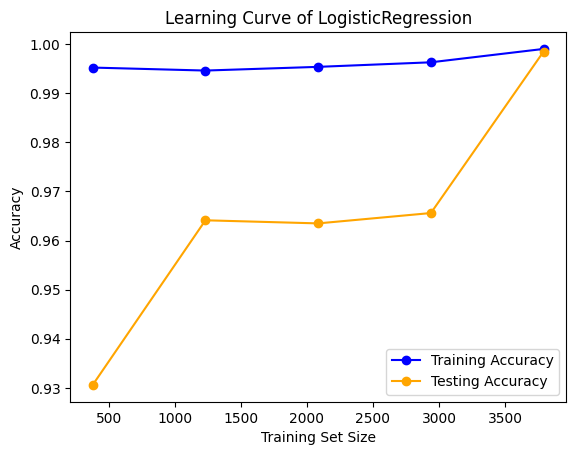

In [ ]:
# visualize the learning plot of logistic regression model
learning_curve_plot(lr, X_resampled, y_resampled)

In [ ]:
# print the training and testing accuracy score
train_test_acc(lr, X_resampled, X_test, y_resampled, y_test)

Training accuracy: 0.999
Testing accuracy: 0.993


> Visualisasi *learning curve* di atas menunjukkan adanya sedikit fluktuasi, terutama pada data testing, dimana ada kalanya gap antara kedua data cukup besar. Walaupun begitu, seiring bertambahnya ukuran data *training set*, nilai akurasi keduanya meningkat dan perbedaannya menjadi lebih kecil. Hal ini mengindikasikan bahwa model logistic regression dapat bekerja dengan baik pada data yang memiliki jumlah *training set* yang cukup.



In [ ]:
# model evaluation
lr_result = evaluate_model(lr)

==== Model LogisticRegression ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  3   0   0   0 101   0   0]
 [  0   2   0   0   0  89   0]
 [  0   0   0   0   0   0  31]]

Metrics Scores
Accuracy: 0.993
Precision (Macro Avg.): 0.995
Recall (Macro Avg.): 0.993
F1-Score (Macro Avg.): 0.994

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       294
           2       1.00      0.98      0.99        92
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        82
           5       0.97      1.00      0.99       101
           6       0.98      1.00      0.99        89
           7       1.00      1.00      1.00        31

    accuracy                           0.99       754
   macro avg       0.99      1.00      0.99       754
weighted avg       0.99      0.99      0.99   

> Hasil evaluasi menunjukkan nilai yang sangat tinggi pada keempat metrik, baik secara keseluruhan maupun per kelas. Hal ini mengindikasikan performa model yang cukup baik pada data ini. Bahkan, performa model ini melampaui keempat model sebelumnya.


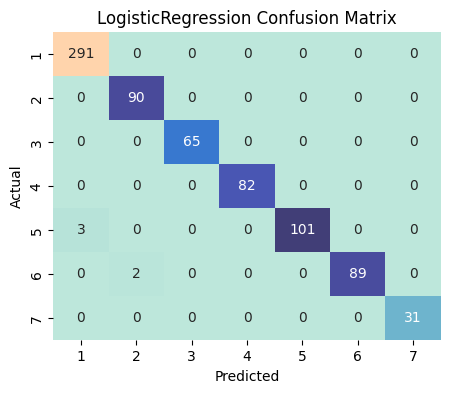

In [ ]:
# display the confusion matrix using heatmap visualization
cm_heatmap(lr, lr_result['Confusion Matrix'], labels=np.unique(y_test))

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

> Pada bagian ini, dilakukan *hyperparameter tuning* terhadap dua model, yaitu KNN dan Decision Tree Classifier. Model KNN dipilih untuk *tuning* karena dari kelima model, KNN memiliki hasil evaluasi terendah meskipun masih tergolong baik. Sementara itu, proses *tuning* juga dilakukan terhadap model decision tree untuk melihat apakah terdapat peningkatan performa dengan memanfaatkan parameter terbaik, serta untuk mengidentifikasi apakah permasalahan *overfitting* dapat diminimalkan.


#### **1. KNN**



In [ ]:
# hyperparameter tuning knn using GridSearchCV
from sklearn.model_selection import GridSearchCV

# define param grid
param_grid = {
    'n_neighbors': np.arange(2, 31, 1)
}

# initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search_knn.fit(X_resampled, y_resampled)

# save best model
print(f'Grid Search KNN Best Params: {grid_search_knn.best_params_}')
best_knn_grid = grid_search_knn.best_estimator_

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.2s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# knn model evaluation after tuning
best_knn_result = evaluate_model(best_knn_grid)

==== Model KNeighborsClassifier ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  80   0   0   0  10   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  3   0   0   0 101   0   0]
 [  0  11   0   0   0  80   0]
 [  0   0   1   1   0   0  29]]

Metrics Scores
Accuracy: 0.966
Precision (Macro Avg.): 0.962
Recall (Macro Avg.): 0.954
F1-Score (Macro Avg.): 0.957

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       294
           2       0.89      0.88      0.88        91
           3       1.00      0.98      0.99        66
           4       1.00      0.99      0.99        83
           5       0.97      1.00      0.99       101
           6       0.88      0.89      0.88        90
           7       0.94      1.00      0.97        29

    accuracy                           0.97       754
   macro avg       0.95      0.96      0.96       754
weighted avg       0.97      0.97      0.97 

> Setelah dilakukan *hyperparameter tuning* menggunakan `GridSearchCV`,
performa model yang diukur berdasarkan keempat metrik tidak menunjukkan perubahan yang signifikan dengan model sebelum *tuning*. Bahkan, hasil evaluasinya sedikit lebih rendah. Oleh karena itu, akan dicoba pendekatan lain, seperti `RandomizedSearchCV`, untuk melihat apakah akan terjadi peningkatan performa model.



In [ ]:
# hyperparameter tuning knn using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define param dist
param_dist = {
    'n_neighbors': np.linspace(10, 50, 5, dtype=int)
}

# initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    estimator=knn, param_distributions=param_dist, n_iter=20, n_jobs=1, cv=3, verbose=2, random_state=42
    )
random_search_knn.fit(X_resampled, y_resampled)

# save best model
print(f'Random Search KNN Best Params: {random_search_knn.best_params_}')
best_knn_random = random_search_knn.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_neighbors=20; total time=   0.2s
[CV] END .....................................n_neighbors=20; total time=   0.2s
[CV] END .....................................n_neighbors=20; total time=   0.2s
[CV] END .....................................n_neighbors=30; total time=   0.2s
[CV] END .....................................n_neighbors=30; total time=   0.2s
[CV] END .....................................n_neighbors=30; total time=   0.2s
[CV] END .....................................n_neighbors=40; total time=   0.2s
[CV] END .....................................n_neighbors=40; total time=   0.2s
[CV] END .....................................n_n

In [ ]:
# reevaluate model performance after tuning using Random Search
best_knn_random_result = evaluate_model(best_knn_random)

==== Model KNeighborsClassifier ====

Confusion Matrix
[[291   0   0   0   0   0   0]
 [  0  83   0   0   0   7   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  2   0   0   0 102   0   0]
 [  0  10   0   0   0  81   0]
 [  0   0   1   1   0   0  29]]

Metrics Scores
Accuracy: 0.972
Precision (Macro Avg.): 0.968
Recall (Macro Avg.): 0.961
F1-Score (Macro Avg.): 0.965

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       293
           2       0.92      0.89      0.91        93
           3       1.00      0.98      0.99        66
           4       1.00      0.99      0.99        83
           5       0.98      1.00      0.99       102
           6       0.89      0.92      0.91        88
           7       0.94      1.00      0.97        29

    accuracy                           0.97       754
   macro avg       0.96      0.97      0.96       754
weighted avg       0.97      0.97      0.97 

> Ternyata, hasil *tuning* menggunakan `RandomizedSearchCV` dengan nilai parameter `n_neighbors` yang ditentukan menghasilkan performa yang jauh lebih baik dibandingkan sebelumnya. Oleh karena itu, model ini akan disimpan sebagai versi final untuk kemudian dibandingkan dengan model lainnya.



#### **2. Decision Tree**

In [ ]:
# hyperparameter tuning decision tree using GridSearchCV

# define param grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search_dt.fit(X_resampled, y_resampled)

# save best model
print(f'Grid Search Decision Tree Best Params: {grid_search_dt.best_params_}')
best_dt_grid = grid_search_dt.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_sam

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# decision tree model evaluation after tuning
best_dt_result = evaluate_model(best_dt_grid)

==== Model DecisionTreeClassifier ====

Confusion Matrix
[[290   0   0   0   1   0   0]
 [  0  87   0   0   0   3   0]
 [  0   0  65   0   0   0   0]
 [  0   0   0  82   0   0   0]
 [  0   0   0   0 104   0   0]
 [  0   2   0   0   0  89   0]
 [  0   0   0   1   0   0  30]]

Metrics Scores
Accuracy: 0.991
Precision (Macro Avg.): 0.989
Recall (Macro Avg.): 0.987
F1-Score (Macro Avg.): 0.988

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       290
           2       0.97      0.98      0.97        89
           3       1.00      1.00      1.00        65
           4       1.00      0.99      0.99        83
           5       1.00      0.99      1.00       105
           6       0.98      0.97      0.97        92
           7       0.97      1.00      0.98        30

    accuracy                           0.99       754
   macro avg       0.99      0.99      0.99       754
weighted avg       0.99      0.99      0.9

> Hasil *hyperparameter tuning* menggunakan `GridSearchCV` menunjukkan peningkatan performa pada model decision tree. Oleh karena itu, model ini akan disimpan sebagai model final dan akan dibandingkan dengan model lainnya.

## **d. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [ ]:
# model summary dict
model_results = {
    'K-Nearest Neighbors (KNN)': best_knn_random_result,
    'Decision Tree Classifier (DT)': best_dt_result,
    'Random Forest Classifier (RF)': rf_result,
    'Support Vector Machine (SVM)': svm_result,
    'Logistic Regression (LR)': lr_result
}

# model summary dataframe
summary_df = pd.DataFrame.from_dict(model_results, orient='index')[['Accuracy', 'Precision (Macro Avg.)', 'Recall (Macro Avg.)', 'F1-Score (Macro Avg.)']]

summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Model'}, inplace=True)

summary_df

,Model,Accuracy,Precision (Macro Avg.),Recall (Macro Avg.),F1-Score (Macro Avg.)
0,K-Nearest Neighbors (KNN),0.972,0.968,0.961,0.965
1,Decision Tree Classifier (DT),0.991,0.989,0.987,0.988
2,Random Forest Classifier (RF),0.981,0.982,0.976,0.978
3,Support Vector Machine (SVM),0.985,0.986,0.980,0.983
4,Logistic Regression (LR),0.993,0.995,0.993,0.994


> Secara keseluruhan, model **Logistic Regression** menunjukkan performa paling unggul di antara kelima model berdasarkan keempat metrik (*accuracy*, *precision*, *recall*, dan *f1-score*). Hal ini menunjukkan bahwa model ini adalah model yang paling sesuai untuk digunakan dalam proses pengklasifikasian data ini.

> Di sisi lain, model **K-Nearest Neighbors** merupakan model dengan performa terendah di antara kelima model. Meskipun demikian, performa model ini sebenarnya tergolong sangat baik dengan nilai metrik mendekati satu. Namun, model ini bukanlah yang paling optimal untuk dataset ini jika dibandingkan dengan model lainnya.

> Selain itu, model **Decision Tree Classifier** juga dapat menjadi alternatif yang layak karena secara keseluruhan memiliki performa yang sangat baik walaupun masih lebih rendah dari Logistic Regression. Model ini juga mudah untuk diinterpretasi, menjadikannya sebagai pilihan jika interpretabilitas diutamakan. Namun, model ini secara alami cenderung rentan terhadap permasalahan *overfitting* sehingga diperlukan tindakan atau pengawasan lebih lanjut jika sudah muncul indikasi terjadinya *overfitting*. Jika permasalahan *overfitting* menjadi perhatian utama, model **Random Forest Classifier** adalah pilihan yang lebih baik karena model ini lebih tahan terhadap *overfitting* karena metode *ensemble*-nya.

> Terakhir, model **Support Vector Machine** juga merupakan pilihan yang bagus, dengan performa yang cukup baik, dan menempati peringkat ketiga setelah model Decision Tree Classifier (setelah dilakukan *tuning*).

